# Basic R

Zhentao Shi

## Statistical Languages

* To learn, time investment is essential
* Python vs R

* Official document: [R-Introduction](https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf)

## Installation

R can be conveniently installed in Windows, MacOS, and Linux. 

* [R project](https://cran.r-project.org/mirrors.html)

* [Microsoft R Open](https://mran.microsoft.com/open)

**Local interfaces**

* `rgui`

* [RStudio](https://www.rstudio.com/products/rstudio/download/)

* Command line interface

**Remote interfaces**

CUHK Econ's [SCRP](https://scrp-login-2.econ.cuhk.edu.hk/) provides 
* RStudio
* JupyterHub 


## Help System

* If exact name of a function known, call `help(function_name)` or `?function_name`
* Otherwise, `??key_words`

In [1]:
?seq

In [ ]:
??sequence

## Assignment

 * `<-` or `=`
   * Personally I prefer "=" to "<-".

In [6]:
a <- 1
b <- 2
f = a + b # try to avoid `c`, which is an internal command
d = log(f)
e = sqrt(d); print(e)

[1] 1.048147


In [7]:
cat("log(c) =", e, "is a simple calculation")
print(e)
cat("exp(e) =", exp(e), ". I want a nice new line. \n")
print(d)

log(c) = 1.048147 is a simple calculation[1] 1.048147
exp(e) = 2.852361 . I want a nice new line. 
[1] 1.098612


In [2]:
ls() # display the objects in memory

[1] "a" "b" "d" "e" "f"

R is case sentitive. `a` and `A` are two different objects.

In [3]:
A = "abc"
cat("a is", a, ", whereas A is ", A, ".")

a is 1 , whereas A is  abc .

Clean up the memory. It is recommended as the first line of a clean script.

In [10]:
rm(list = ls())

In [11]:
ls()

character(0)

## Vector

* A collection of elements of the same type, 
  * integer
  * logical
  * real number
  * complex number 
  * characters
  * factor

  
* R does not require explicit type declaration.

 * `c()`  combines two or more vectors into a long vector.
 * Binary arithmetic operations
   * element by element 
   * `+`, `-`, `*` and `/`
   * logical operations `&` `|` `!=`

In [12]:
a = c(1,2,3, 4)

In [13]:
b = rep(c(1,2), 2)

In [14]:
print(a+b)
print(a)
print(b)

[1] 2 4 4 6
[1] 1 2 3 4
[1] 1 2 1 2


In [5]:
# logical vectors
logi_1 <- c(T, T, F)
logi_2 <- c(F, T, T)

logi_12 <- logi_1 & logi_2
print(logi_12)

[1] FALSE  TRUE FALSE


Missing values in R is represented as `NA` (Not Available). 

In [ ]:
   a = NA; b = 3; a+b

When some operations are not allowed, say, `log(-1)`, R returns  `NaN` (Not a Number).

In [6]:
log(-1)

Warning message in log(-1):
"NaNs produced"


[1] NaN

In [ ]:
sqrt(-1)

In [ ]:
a = Inf
a+a

In [ ]:
b = -Inf
a+b

## Selection

* Vector selection is specified in square bracket `a[ ]` 
  * by either positive integer or logical vector.
  * Index initiates from 1, not 0 (Python's rule). 

In [ ]:
a = 1:10
a[5:7]

In [ ]:
d = seq(-1, 1, by = 0.1); print(d)
d[5:7]

In [ ]:
c = c("a","b","c","d","e","f","g","h","i","j")
c[5:7]

In [ ]:
b = "abcdefghij"
b[5:7] # the indexed items do not exists

## Data types

* The way R stores data

In [5]:
a <- "18"; print(a)
b <- as.numeric(a); print(b)

[1] "18"
[1] 18


In [2]:
x = pi * c(-1:1, 10); print(x)
as.integer(x)

[1] -3.141593  0.000000  3.141593 31.415927


[1] -3  0  3 31

In [6]:
a = 3
is.integer(a) # it is numeric

a = as.integer(3)
print(a)
is.integer(a)

b = as.double(a)
is.integer(b)
print(b)

[1] FALSE

[1] 3


[1] TRUE

[1] FALSE

[1] 3


## Array and Matrix

* *array*: number table of multiple dimensions. 
* *matrix*: 2-dimensional array.

* R is column major order
* array arithmetic: element-by-element. 

In [7]:
A = array(rpois(4*3*2, lambda = 1), dim = c(4,3,2)); print(A) # 3 dimensional array

, , 1

     [,1] [,2] [,3]
[1,]    0    2    1
[2,]    0    1    0
[3,]    2    3    1
[4,]    0    4    2

, , 2

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    1    0    0
[3,]    2    3    1
[4,]    1    2    2



In [8]:
B = A = array(rnorm(4*3*2), dim = c(4,3,2))
print(A+B)

, , 1

          [,1]      [,2]       [,3]
[1,]  1.519325  0.486936  1.1795191
[2,] -2.994508 -1.295638 -1.3991541
[3,] -1.235188  2.174455  0.3321174
[4,] -1.181144  1.068371 -1.2485114

, , 2

           [,1]      [,2]        [,3]
[1,] -2.9899291 -1.427051  0.09607432
[2,] -2.1203690  1.023019 -0.79512606
[3,] -0.3524867 -1.164643  1.59907674
[4,]  1.8086810  2.317843  1.30410865



Caution must be exercised in binary operations involving two objects of different length. This is error-prone.

In [9]:
A = matrix(1:6, 3); print(A)

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6


In [9]:
B = matrix(1:3, 3); print(B)

     [,1]
[1,]    1
[2,]    2
[3,]    3


In [10]:
print(A+B) # produce error message

ERROR: Error in A + B: non-conformable arrays


In [11]:
b = 1:3
print(A+b)

     [,1] [,2]
[1,]    2    5
[2,]    4    7
[3,]    6    9


In [12]:
d = 1:4
print(A+d)

Warning message in A + d:
"longer object length is not a multiple of shorter object length"


     [,1] [,2]
[1,]    2    8
[2,]    4    6
[3,]    6    8


## Matrix Operations

* `%*%`: matrix multiplication
* `solve` matrix inverse
* `eigen` eigenvalues and eigenvectors

**Example**: OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$$\hat{\beta} = (X' X)^{-1} X'y.$$
To conduct OLS estimation in R, we literally translate the mathematical expression into code.



Step 1: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [10]:
# simulate data
rm(list = ls())
set.seed(111) # can be removed to allow the result to change

# set the parameters
n <- 100
b0 <- matrix(1, nrow = 2)

# generate the data
e <- rnorm(n)
X <- cbind(1, rnorm(n))
Y <- X %*% b0 + e

Step 2: translate the formula to code


In [12]:
# OLS estimation
bhat <- solve(t(X) %*% X, t(X) %*% Y); print(bhat)

          [,1]
[1,] 0.9861773
[2,] 0.9404956


In [14]:
bhat <- solve( crossprod(X), crossprod(X, Y))
print( bhat ) # equivalent computation

          [,1]
[1,] 0.9861773
[2,] 0.9404956


Step 3 (additional): plot the regression graph with the scatter points and the regression line.

* Further compare the regression line (black) with the true coefficient line (red).


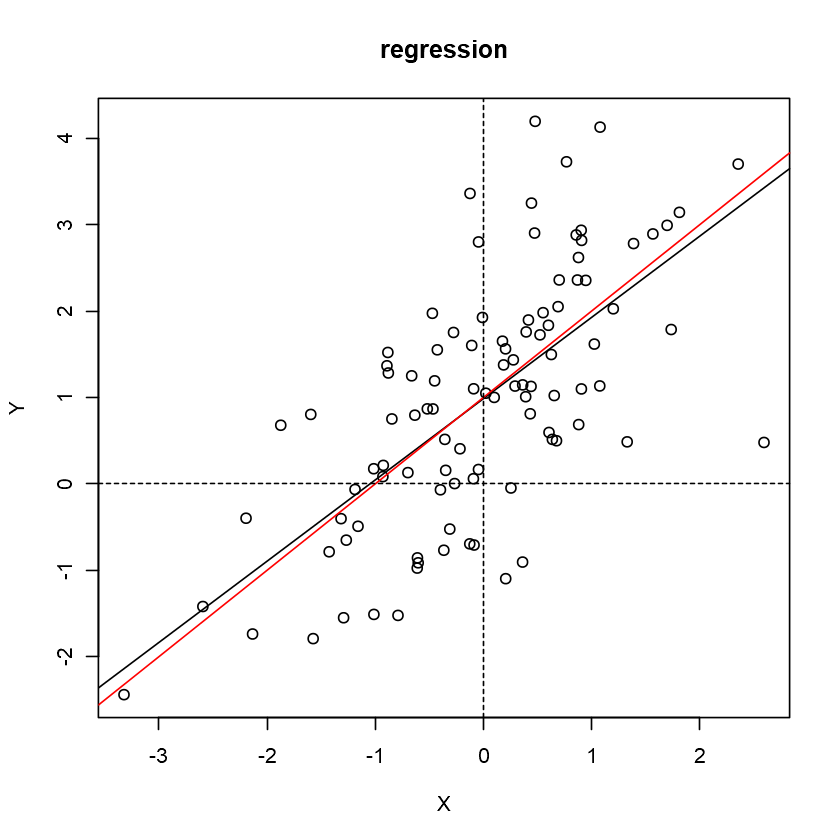

In [15]:
# plot
plot(y = Y, x = X[, 2], xlab = "X", ylab = "Y", main = "regression")
abline(a = bhat[1], b = bhat[2])
abline(a = b0[1], b = b0[2], col = "red")
abline(h = 0, lty = 2)
abline(v = 0, lty = 2)


Step 4: Hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.


In [16]:
# calculate the t-value
bhat2 <- bhat[2] # the parameter we want to test
e_hat <- Y - X %*% bhat
sigma_hat_square <- sum(e_hat^2) / (n - 2)
Sigma_B <- solve(t(X) %*% X) * sigma_hat_square
t_value_2 <- (bhat2 - b0[2]) / sqrt(Sigma_B[2, 2])
cat("The t-statistic =", t_value_2)


The t-statistic = -0.5615293

## Mixed Data Types

*  *Vector* only contains one type of elements.
* *list* is a basket for objects of various types.
  * A container when a procedure returns more than one useful object.

In [20]:
Lst <- list(dept = "Econ", no = 5821)
Lst

$dept
[1] "Econ"

$no
[1] 5821

In [21]:
Lst$dept

[1] "Econ"

In [22]:
Lst[[2]]

[1] 5821

**Example**: When we invoke `eigen`, we are
interested in both eigenvalues and eigenvectors,
which are stored into `$value` and `$vector`, respectively.

In [23]:
A = diag(2)
eigen(A)

eigen() decomposition
$values
[1] 1 1

$vectors
     [,1] [,2]
[1,]    0   -1
[2,]    1    0


## Package

* Base installation is small
* Extensive ecosystem of add-on packages.
* Most packages are hosted on [CRAN](https://cran.r-project.org/web/packages/).
 

* Installation: `install.packages("package_name")`. 

* Invoking: `library(package_name)` or `package_name::function_name`

In [24]:
# auto install missing packages
wanted <- c("magrittr", "AER", "quantmod", "reshape2", "gridExtra")
missing <- setdiff(wanted, installed.packages())

install.packages(missing)

In [25]:
library(magrittr)

Warning message:
"package 'magrittr' was built under R version 4.1.3"


# Data Frame

* *data.frame* is a two-dimensional table that stores the data, 
  * similar to a spreadsheet in Excel.

* *Matrix* it only accommodates one type of elements.

* `tibble` is a new and refined alternative data frame type.

The following is a data set in a graduate-level econometrics textbook. 
We load the data into memory and display the first 6 records.

In [27]:
library(AER)
data("CreditCard")
head(CreditCard)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,yes,0,37.66667,4.5200,0.033269910,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005216942,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004155556,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065213780,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067050590,546.503300,yes,no,2,64,1,5
6,yes,0,23.25000,2.5000,0.044438400,91.996670,no,no,0,54,1,1


In [28]:
print(tail(CreditCard$income))

[1] 2.180 4.566 3.192 4.600 3.700 3.700


## Input and Output

* Raw data is often saved in ASCII file or Excel.
* Excel spreadsheet is discouraged.
* Recommend `csv` format

`read.table()` or `read.csv()` imports data from an ASCII file into an R session.

**Example**: Acemoglu, Johnson and Robinson (2001). [Data source](https://economics.mit.edu/faculty/acemoglu/data/ajr2001). 
* This empirical example was adopted by Chang, Shi and Zhang (2022).

In [29]:
AJR = read.csv("data_example/AJR.csv", header = TRUE)
head(AJR)

,shortnam,logpgp95,loghjypl,avexpr,lat_abst,logem4,malfal94,yellow,leb95,imr95,meantemp,lt100km,euro1900,democ1,cons1,democ00a,cons00a
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,AGO,7.770645,-3.4112480,5.363636,0.1366667,5.634789,0.95000,1,46.49,125.0,22.94133,0.118758,8,0,3,0,1
2,ARG,9.133459,-0.8722738,6.386364,0.3777778,4.232656,0.00000,0,72.89,21.8,17.10000,0.123089,60,1,1,3,3
3,AUS,9.897972,-0.1707883,9.318182,0.3000000,2.145931,0.00000,1,78.25,5.6,20.90000,0.198958,98,10,7,10,7
4,BFA,6.845880,-3.5404590,4.454545,0.1444445,5.634789,0.95000,1,44.39,98.8,28.10000,0.000000,0,0,3,0,1
5,BGD,6.877296,-2.0635680,5.136364,0.2666667,4.268438,0.12008,1,58.13,78.8,25.68621,0.401598,0,8,7,0,1
6,BHS,9.285448,NA,7.500000,0.2683333,4.442651,NA,1,NA,NA,NA,NA,10,NA,NA,NA,NA


<a id='AJR_exec'></a>
**Exercise**

Use the dataset `AJR.csv`. 
* Collect a small dataset with five columns `shortnam`, `logpgp95`, `avexpr`, `lat_abst`, `logem4` (log of mortality rate) and `cons1`.
* If any country has one of the above variables missing, remove that country from the data. (Hint: use `apply()`.)

* It is better to convert Chinese characters into the encoding `UTF-8`. 
  * Need experiment to deal with garbled texts.
  * `Notepad++` is a free tool for conversion; check `Encoding` in its menu.

In [32]:
# stock_id <- readr::read_csv("data_example/SH_stockid_UTF8.csv", locale = readr::locale(encoding = "UTF-8"))
stock_id <- readr::read_csv("data_example/SH_stockid_UTF8.csv")
head(stock_id)

Rows: 882 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): name, pinyin
dbl (1): id

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,id,pinyin
<chr>,<dbl>,<chr>
<U+6D66><U+53D1><U+94F6><U+884C>,600000,pu fa yín háng
<U+767D><U+4E91><U+673A><U+573A>,600004,bái yún ji cháng
<U+6B66><U+94A2><U+80A1><U+4EFD>,600005,wu gang gu bin
<U+4E1C><U+98CE><U+6C7D><U+8F66>,600006,dong feng gài che
<U+4E2D><U+56FD><U+56FD><U+8D38>,600007,zhong guó guó mào
<U+9996><U+521B><U+80A1><U+4EFD>,600008,shou chuang gu bin



`write.table()` or `write.csv()` exports the data in an R session to an ASCII file.

In [33]:
write.csv(CreditCard, "CreditCard.csv")

**Example**

* Download data from internet.

* Retrieve the stock daily data of *Apple Inc.* from *Yahoo Finance*
  * package `quantmod` is used.

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2023-01-06    126.01    130.29   124.89     129.62    87686600        129.62
2023-01-09    130.47    133.41   129.89     130.15    70790800        130.15
2023-01-10    130.26    131.26   128.12     130.73    63896200        130.73
2023-01-11    131.25    133.51   130.46     133.49    69458900        133.49
2023-01-12    133.88    134.26   131.44     133.41    71379600        133.41
2023-01-13    132.03    134.92   131.66     134.76    57758000        134.76

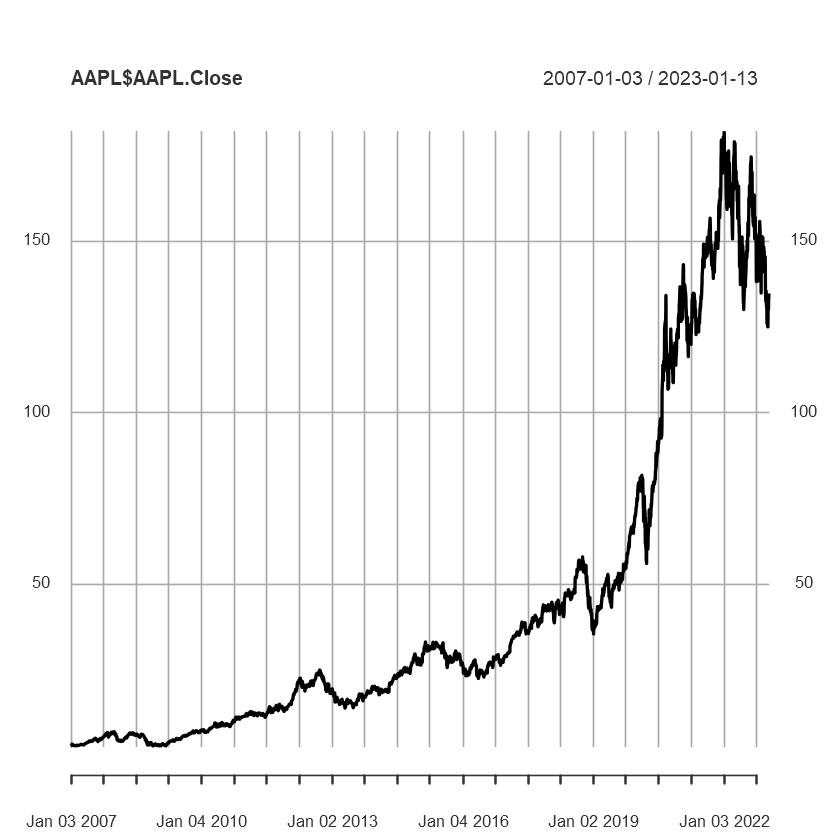

In [34]:
quantmod::getSymbols("AAPL", src = "yahoo")
tail(AAPL)
plot(AAPL$AAPL.Close)


Another example: [Quarterly US Industrial Production Index](https://fred.stlouisfed.org/series/IPB50001SQ)


[1] "IPB50001SQ"

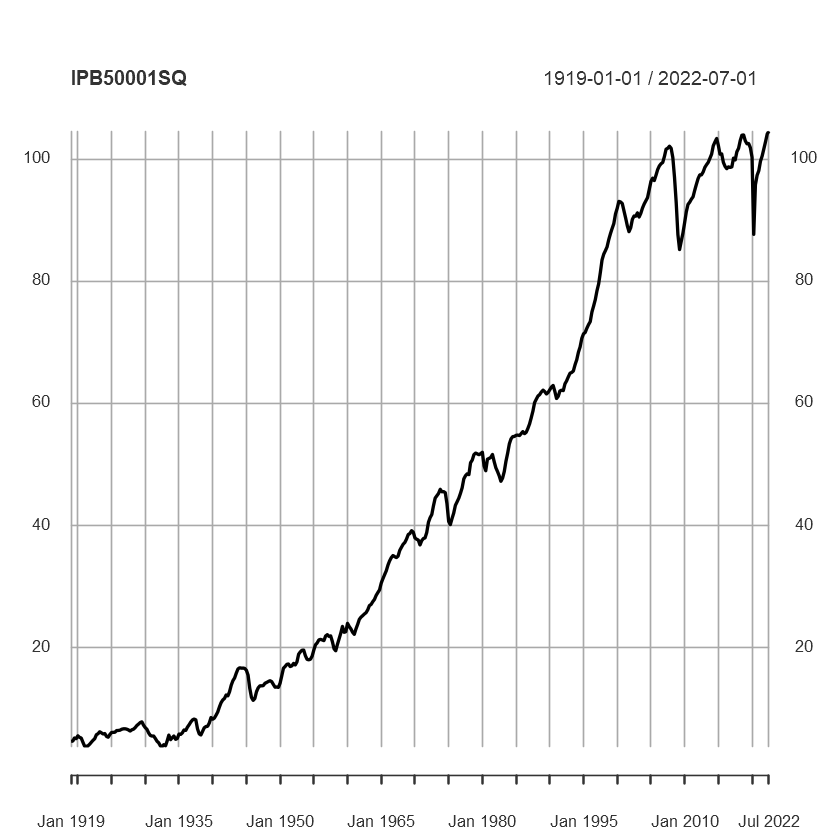

In [35]:
quantmod::getSymbols.FRED(Symbols = c("IPB50001SQ"), env = .GlobalEnv)
plot(IPB50001SQ)

## Statistics

* R is created by statisticians.

* `p` (probability)
* `d` (density)
* `q` (quantile)
* `r` (random variable generator) 

* `norm` (normal)
* `chisq` ($\chi^2$)
* `t` (*t*)
* `weibull` (Weibull)
* `cauchy` (Cauchy)
* `binomial` (binomial)
* `pois` (Poisson)

In [36]:
pnorm(0)

[1] 0.5

In [37]:
qnorm(0.975)

[1] 1.959964

In [38]:
rnorm(5)

[1] -0.2986997 -0.5935356  0.8267038 -2.1614064 -0.9210425

In [39]:
dnorm(0)

[1] 0.3989423

**Example**

This example illustrates the sampling error.

1. Plot the density of $\chi^2(3)$ over an equally spaced grid system `x_axis = seq(0.01, 15, by = 0.01)` (black line).
2. Generate 1000 observations from $\chi^2(3)$ distribution. Plot the kernel density, a nonparametric estimation of the density (red line).
3. Calculate the 95th quantile and the empirical probability of observing a value greater than the 95-th quantile.
In population, this value should be 5%. What is the number in this experiment?

set.seed(888)
x_axis <- seq(0.01, 15, by = 0.01)

y <- dchisq(x_axis, df = 3)
plot(y = y, x = x_axis, type = "l", xlab = "x", ylab = "density")
z <- rchisq(1000, df = 3)
lines(density(z), col = "red")
crit <- qchisq(.95, df = 3)

mean(z > crit)


## User-defined Function

* Highly recommended to encapsulate repeated procedures into a user-defined function.

1. In the developing stage, focus on a small chunk of code. More manageable.
2. Variables defined inside a function are local.
3. In revision, only need to change one place. 

The format of a user-defined function is

```
function_name <- function(input) {
  expressions
  return(output)
}
```

**Example**

* 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.

* An easy job, but no built-in function.


In [12]:
# construct confidence interval

CI <- function(x) {
  # x is a vector of random variables

  n <- length(x)
  mu <- mean(x)
  sig <- sd(x)
  upper <- mu + 1.96 / sqrt(n) * sig
  lower <- mu - 1.96 / sqrt(n) * sig
  return(list(lower = lower, upper = upper))
}


## Flow Control

* Flow control is common in all programming languages.

  * `if` is used for choice
  * `for` or `while` is used for loops.


**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [10]:
Rep <- 1000
sample_size <- 100
capture <- rep(0, Rep)

if (sample_size < 50){
      print("Sample size too small. Refuse to work")
      } else {
    for (i in 1:Rep) {
      mu <- 2
      x <- rpois(sample_size, mu)
      bounds <- CI(x)
      capture[i] <- ((bounds$lower <= mu) & (mu <= bounds$upper))
    }
    print("Asymptotic theory may work")
    cat("the emprical size = ", mean(capture)) # empirical size
}

[1] "Asymptotic theory may work"
the emprical size =  0.944

## Statistical Model

* `y~x`
  * `y`: dependent variable,
  * `x`: explanatory variable.
* `lm(y~x, data = data_frame)`.


### A Linear Regression 

This is a toy example with simulated data.

In [40]:

T <- 100
p <- 1

b0 <- 1
# Generate data
x <- matrix(rnorm(T * p), T, 1)
y <- x %*% b0 + rnorm(T)

# Linear Model
result <- lm(y ~ x)
summary(result)



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21645 -0.60012  0.08609  0.52849  3.05926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01380    0.09772   0.141    0.888    
x            0.94391    0.10786   8.751 6.18e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9636 on 98 degrees of freedom
Multiple R-squared:  0.4386,	Adjusted R-squared:  0.4329 
F-statistic: 76.58 on 1 and 98 DF,  p-value: 6.184e-14


The `result` object is a list containing the regression results. As shown in the results, we can easily read the estimated coefficients, t-test results, F-test results, and the R-squared.

We can plot the true value of $y$ and fitted value to examine whether the regression model fit the data well.


In [ ]:
plot(result$fitted.values,
  col = "red", type = "l", xlab = "x", ylab = "y",
  main = "Fitted Value"
)
lines(y, col = "blue", type = "l", lty = 2)
legend("bottomleft",
  legend = c("Fitted Value", "True Value"),
  col = c("red", "blue"), lty = 1:2, cex = 0.75
)



Then we plot the best fitted line.


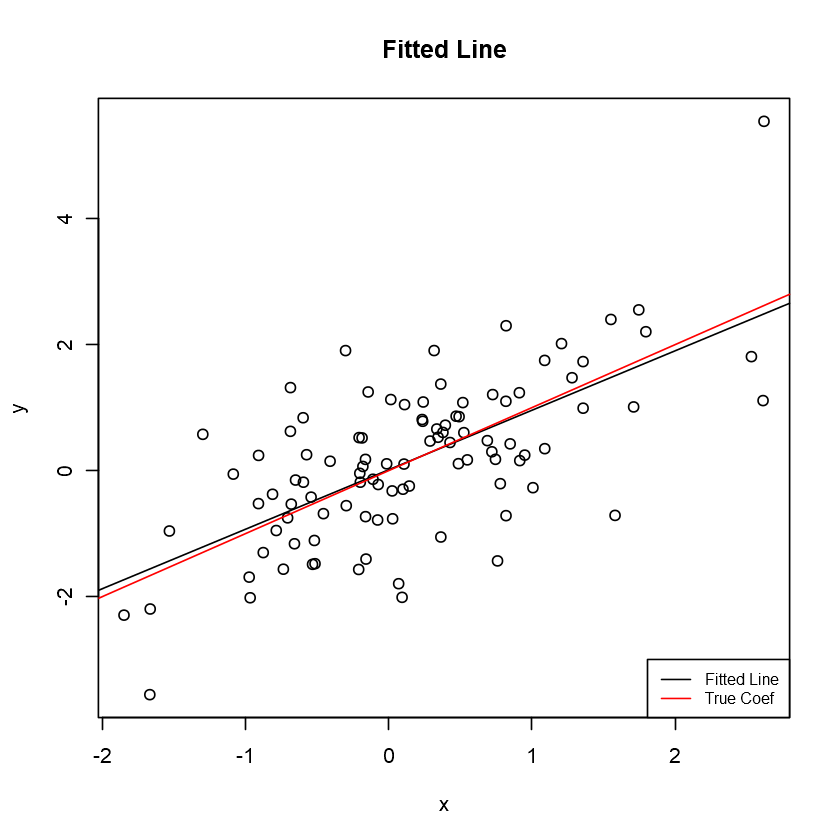

In [41]:
plot(y = y, x = x, xlab = "x", ylab = "y", main = "Fitted Line")
abline(a = result$coefficients[1], b = result$coefficients[2])
abline(a = 0, b = b0, col = "red")

legend("bottomright",
  legend = c("Fitted Line", "True Coef"),
  col = c("black", "red"), lty = c(1, 1), cex = 0.75
)


## Regression: Real Data Example

* Relationship between the height and weight of women.
* The dataset is from the package `datasets` (a built-in package with R)


In [42]:
# univariate
reg1 <- lm(height ~ weight, data = women)

# multivariate
reg2 <- lm(height ~ weight + I(weight^2), data = women)
# "weight^2" is a square term.
# "I()" is used to inhibit the formula operator "+"
# from being interpreted as an arithmetical one.

summary(reg1)
summary(reg2)



Call:
lm(formula = height ~ weight, data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83233 -0.26249  0.08314  0.34353  0.49790 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.723456   1.043746   24.64 2.68e-12 ***
weight       0.287249   0.007588   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.44 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14



Call:
lm(formula = height ~ weight + I(weight^2), data = women)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.105338 -0.035764 -0.004898  0.049430  0.141593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.175e+01  1.720e+00   -6.83 1.82e-05 ***
weight       8.343e-01  2.502e-02   33.35 3.36e-13 ***
I(weight^2) -1.973e-03  9.014e-05  -21.89 4.84e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07158 on 12 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 2.732e+04 on 2 and 12 DF,  p-value: < 2.2e-16


**Exercise**

In a [previous exercise](#AJR_exec) we have compiled a subset of observations in `AJR.csv` with all variables `shortnam`, `logpgp95`, `avexpr`, `lat_abst`, and `logem4` and none is missing.
Run an instrumental variable regression with `logpgp95` as the dependent variables, 
`avexpr` and `latabst` as explanatory variables, 
and `logem4` and `lat_abst` as instrumental variables. (Hint: use the function `AER::ivreg()`)


## Reading

<!-- [Wickham and Grolemund](https://r4ds.had.co.nz/): Ch 1, 2, 4, 8, 19 and 20 -->
* A thorough reading of [R-Introduction](https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf) 
* Wickham and Grolemund](https://r4ds.had.co.nz/)
  * Ch 4: workflow:basics
  * Ch 6: workflow:scripts
